In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("../../train.csv")
X = df["Text"].values
y = df["Category"].values
m = 0.9 #proportion of data for training vs validation
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=m, random_state=42, shuffle=True)

### Task 2

(d) NN. Consider a neural network with the following hyperparameters: the initial weights
uniformly drawn in range [0,0.1] with learning rate 0.01.

    ● Train a single hidden layer neural network using the hyperparameters on the training dataset, except for the number of hidden units (x) which should vary among 5, 20, and 40. Run the optimization for 100 epochs each time. Namely, the input layer consists of n features x = [x1, ..., xn]^T , the hidden layer has x nodes z = [z1, ..., zx]^T , and the output layer is a probability distribution y = [y1, y2]^T over two classes.

    ● Plot the average training cross-entropy loss as shown below on the y-axis versus the number of hidden units on the x-axis. Explain the effect of numbers of hidden units.

vector vocabulary - None

features
 ['00' '000' '000th' ... 'zooms' 'zooropa' 'zorro']

vector shape: (428, 13518)

article vector
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[9.41061006e-01 5.89389945e-02]
 [3.13270850e-05 9.99968673e-01]
 [7.02200449e-06 9.99992978e-01]
 [9.99973817e-01 2.61830141e-05]
 [9.99946559e-01 5.34409106e-05]
 [9.99459303e-01 5.40697294e-04]
 [9.99195568e-01 8.04432157e-04]
 [7.03442978e-05 9.99929656e-01]
 [9.93203958e-01 6.79604201e-03]
 [9.99482128e-01 5.17871599e-04]
 [9.99731486e-01 2.68513523e-04]
 [3.59020463e-04 9.99640980e-01]
 [9.84321854e-01 1.56781459e-02]
 [9.99284745e-01 7.15255372e-04]
 [9.99999505e-01 4.94509252e-07]
 [9.99332921e-01 6.67079195e-04]
 [9.38282034e-01 6.17179660e-02]
 [9.99711879e-01 2.88121450e-04]
 [5.74542828e-03 9.94254572e-01]
 [8.76703965e-06 9.99991233e-01]
 [9.99960973e-01 3.90271765e-05]
 [9.99944617e-01 5.53831362e-05]
 [2.23312223e-04 9.997

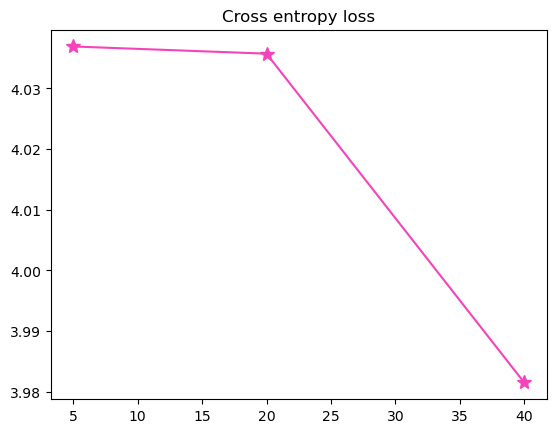

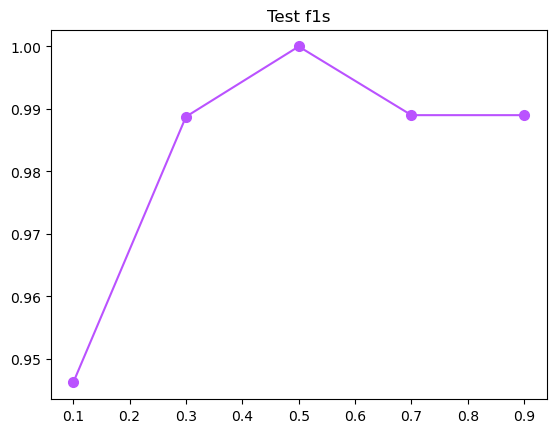

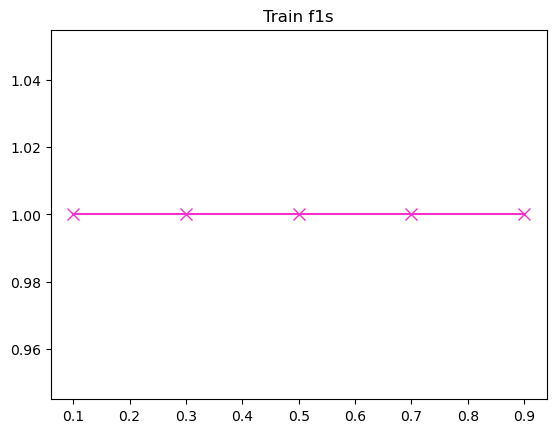

In [ ]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import math
import matplotlib.pyplot as plt
import numpy as np

def main():
    data = make_df("../../train.csv")
    y = data["Category"]
    test_data = make_df("../../test.csv")
    y_test = test_data["Category"]       
    vector, vector_test = vectorize(data, test_data)
 #   make_classifier(vector, data, vector_test)

    cels = []
    num_nods = [5, 20, 40]
    for num in num_nods:
        probs, clf = make_classifier(vector, y, vector_test, num)
        cel = calc_cels(probs, y, clf)
        cels.append(cel)

    plt.plot(num_nods, cels, marker = "*", color = "#F543BA", markersize = 10)
    plt.title("Cross entropy loss")
    plt.show()

    ms = [0.1, 0.3, 0.5, 0.7, 0.9]
    test_f1s = []
    train_f1s = []

    for m in ms:
        train_f1, test_f1 = train_on_m(y, vector, vector_test, m, y_test)
        test_f1s.append(test_f1)
        train_f1s.append(train_f1)

    
    plt.plot(ms, test_f1s, marker = "o", color = "#BA52FF", markersize = 7)
    plt.title("Test f1s")
    plt.show()

    plt.plot(ms, train_f1s, marker = "x", color = "#F431CB", markersize = 8)
    plt.title("Train f1s")
    plt.show()
    

def vectorize(data, test_data):
    vectorizer = CountVectorizer()
    vectorizer.fit(data["Text"])
    print(f'vector vocabulary - {vectorizer.vocabulary}\n')

    vector = vectorizer.transform(data["Text"])
    test_vector = vectorizer.transform(test_data["Text"])
    
    print(f'features\n {vectorizer.get_feature_names_out()}\n')

    print(f'vector shape: {vector.shape}\n')
    print(f'article vector\n {vector.toarray()}')

    return vector, test_vector

def make_df(filename):
    df = pd.read_csv(filename)
    
    return df
    
def calc_cels(probs, train_y, clf):
    total = 0
    print(probs)
    print(clf.classes_)
    print(train_y)
    for ind in range(len(probs)):
        loss1 = 0
        loss2 = 0
        if train_y[ind] == "tech":
            loss1 = math.log(probs[ind][1])
            print("probability 1", probs[ind][1])
            print("loss1", loss1)
        else:
            loss1 = 0
        if train_y[ind] == "entertainment":
            loss2 = math.log(probs[ind][0])
            print("probability 2", probs[ind][0])
            print("loss2", loss2)
        else:
            loss2 = 0
        cel = - (loss1 + loss2)
        total += cel

    print(np.mean(clf.loss_curve_))

    avg_cel = total / len(probs)

    return avg_cel

# passes in training xs, training ys, testing xs
''' THIS IS THE CLASSIFIER FUNCTION YOU SHOULD MIRROR FOR YOUR MODEL FOR IT TO WORK WITH TASK 3
    IGNORE num_nodes that is specific to the NN classifier. 
'''
def make_classifier(vector, y, vector_test, num_nodes = 5): 

    clf = MLPClassifier(activation = 'relu', solver = 'sgd', learning_rate_init = 0.01,
                        max_iter = 100, hidden_layer_sizes = (num_nodes,)).fit(vector, y)


    probs = clf.predict_proba(vector_test)

    return probs, clf
        
def train_on_m(train_y, vector, vector_test, m, y_test):
    
    sub_vector = vector[0:round(vector.shape[0]*m)]
    
    probs, clf = make_classifier(sub_vector, train_y[0:round(len(train_y)*m)], vector_test)

    preds_test = clf.predict(vector_test)

    preds_train = clf.predict(sub_vector)

    train_f1 = calc_f1(preds_train, train_y)
    test_f1 = calc_f1(preds_test, y_test)

    return train_f1, test_f1

def calc_f1(preds, actual):
    tp = 0
    fp = 0
    fn = 0
    tn = 0

# tech is positive

    for i in range(len(preds)):
        if preds[i] == "tech" and actual[i] == "tech":
            tp += 1
        elif preds[i] == "tech" and actual[i] == "entertainment":
            fp += 1
        elif preds[i] == "entertainment" and actual[i] == "entertainment":
            tn += 1
        else:
            fn += 1


    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2*((precision*recall) / (precision+recall))

    return f1

main()

# hyperparams; #hidden layers, #neurons per layer, #activation function

# adj initial weight, adj learning rate, adj # epoch,
#adj # hidden units (1layer has x units)

#act function relu
#solver sgd
#alpha leave default
#learning_rate_init: set to 0.01
#max_iter: 100 (#epochs)
#

# got a warning.warn from warnings which told us there was a warning about convergance, stopped training bc max iter = 1


### Task 3

(a) We explore how the size of the training data set affects the test and train accuracy. For each
value of m in [0.1, 0.3, 0.5, 0.7, 0.9], train your classifier on the first m portion of the training
examples (that is, use the data given by XTrain[0:mN] and yTrain[0:mN]). Please report two
plots: (i) training and (ii) testing accuracy for each such value of m with the x-axis referring to m
and the y-axis referring to the classification accuracy in 𝐹1 measure as shown below. In total,
there should be four curves for training accuracy and four curves for testing accuracy. Explain
the general trend of the two plots in terms of training and testing accuracy if any.

In [ ]:
def train_on_m(train_y, vector, vector_test, m, y_test):
    
    sub_vector = vector[0:round(vector.shape[0]*m)]
    
    probs, clf = make_classifier(sub_vector, train_y[0:round(len(train_y)*m)], vector_test)

    preds_test = clf.predict(vector_test)

    preds_train = clf.predict(sub_vector)

    train_f1 = calc_f1(preds_train, train_y)
    test_f1 = calc_f1(preds_test, y_test)

    return train_f1, test_f1

def calc_f1(preds, actual):
    tp = 0
    fp = 0
    fn = 0
    tn = 0

# tech is positive

    for i in range(len(preds)):
        if preds[i] == "tech" and actual[i] == "tech":
            tp += 1
        elif preds[i] == "tech" and actual[i] == "entertainment":
            fp += 1
        elif preds[i] == "entertainment" and actual[i] == "entertainment":
            tn += 1
        else:
            fn += 1


    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2*((precision*recall) / (precision+recall))

    return f1

(b) Let’s use 5-fold cross-validation to assess model performance. Investigate the impact of key
hyperparameters of your choices for each classifier using a testing dataset. E.g., for SVM, the
classification accuracy may be significantly affected by the kernels and hyperparameter
combination. List hyperparameters for each classifier and demonstrate how these
hyperparameters impact on the testing accuracy.

In [ ]:
#use 5-fold CV to assess performance, experiment w diff hyperparams

from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

def vectorize(data, test_data):
    vectorizer = CountVectorizer()
    vectorizer.fit(data["Text"])
    print(f'vector vocabulary - {vectorizer.vocabulary}\n')

    vector = vectorizer.transform(data["Text"])
    test_vector = vectorizer.transform(test_data["Text"])
    
    print(f'features\n {vectorizer.get_feature_names_out()}\n')

    print(f'vector shape: {vector.shape}\n')
    print(f'article vector\n {vector.toarray()}')

    return vector, test_vector

def make_df(filename):
    df = pd.read_csv(filename)
    
    return df

def main():
    data = make_df("../../train.csv")
    y = data["Category"]
    test_data = make_df("../../test.csv")
    y_test = test_data["Category"]       
    vector, vector_test = vectorize(data, test_data)
    probs, model = make_classifier(vector, y, vector_test)

    cross_validate(model, vector, y, vector_test, y_test)

    # passes in training xs, training ys, testing xs
def make_classifier(vector, y, vector_test, num_nodes = 5): # discuss num nodes in report

    clf = MLPClassifier(activation = 'relu', solver = 'sgd', learning_rate_init = 0.01,
                        max_iter = 100, hidden_layer_sizes = (num_nodes,)).fit(vector, y)


    probs = clf.predict_proba(vector_test)

    return probs, clf

def cross_validate(clf, train_descriptions, train_y, test_descriptions, test_y):
    # use kfold validation (k = 5).
    # hyperparameters that we used:
    
    scores = cross_val_score(clf, train_descriptions, train_y, cv=5, scoring="f1_macro")

    print("Scores for normal classifier:", scores, "with average", str(sum(scores) / len(scores)))

    # LEARNING RATE
    # very low learning rate had bad accuracy suggesting that it does not converge to minima with that epoch count
    # marginal change, but incr learning rate caused slightly lower avg perf, so better to keep small (not too small for computations sake.
    print("LEARNING RATE")
    learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.75, 1, 2, 5]
    for learning_rate in learning_rates:
        # retrain clf
        clf = MLPClassifier(activation = 'relu', solver = 'sgd', learning_rate_init = learning_rate,
                        max_iter = 100, hidden_layer_sizes = (5,)).fit(train_descriptions, train_y)
        get_scores(clf, test_descriptions, test_y, "learning rate", learning_rate)

    # MAX ITER
    # for very low values of max_iter_val, we get a convergence warning
    # always for 5 and 50, sometimes for 100, never for bigger than that
    # really large epoch values don't give much noticeable change to the accuracy
    # therefore suggesting there has been convergence before that many epochs and we are running unnecessarily
    # so we will use the default from scikit learn of 200 epochs.
    print("MAX ITERATIONS")
    max_iter_values = [5, 50, 100, 200, 500, 1000, 5000]
    for max_iter_val in max_iter_values:
        # retrain clf
        clf = MLPClassifier(activation = 'relu', solver = 'sgd', learning_rate_init = 0.01,
                        max_iter = max_iter_val, hidden_layer_sizes = (5,)).fit(train_descriptions, train_y)
        get_scores(clf, test_descriptions, test_y, "max iterations", max_iter_val)

    # ACTIVATION FUNCTION
    # doesn't seem like there's much change beyond natural variation
    # all between 97 and 99 which we have seen similar scores from relu alone
    # might be worth looking at sigmoid vs relu for this context to justify continuing with relu
    print("ACTIVATION FUNCTION")
    activation_functions = ["relu", "identity", "logistic", "tanh"]
    for function in activation_functions:
        # retrain clf
        clf = MLPClassifier(activation = function, solver = 'sgd', learning_rate_init = 0.01,
                        max_iter = 100, hidden_layer_sizes = (5,)).fit(train_descriptions, train_y)
        get_scores(clf, test_descriptions, test_y, "activation function", function)

    # HIDDEN LAYERS
    # increasing number of hidden layers for this decreased accuracy, and also gave us warning from warnings.warn convergence warning
    # this meant that the optimal number of hidden layers for 100 epoch is 1
    # but may need fine tuning alongside other epoch numbers
    print("HIDDEN LAYERS")
    num_layers = [1, 2, 3, 4, 5, 10, 20, 40]
    for num in num_layers:
        # retrain clf
        sizes = (5,) * num
        clf = MLPClassifier(activation = 'relu', solver = 'sgd', learning_rate_init = 0.01,
                        max_iter = 100, hidden_layer_sizes = sizes).fit(train_descriptions, train_y)
        get_scores(clf, test_descriptions, test_y, "number of layers = ", num)


    # EPOCHS & LEARNING RATE TOGETHER
    # learning rate of 0.5 was best for any epoch size
    # epoch of size 500 & 1000 with 0.5 learning rate tied best w score of 0.9603
    # landed on epoch size 500 for computation sake

    # taking subset of the better epochs and learning rates
    max_iter_values = [100, 200, 500, 1000, 5000]
    learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
    for iter_val in max_iter_values:
        for learning_rate in learning_rates:
        # retrain clf for each combo of learning rate and max iter
            clf = MLPClassifier(activation = 'relu', solver = 'sgd', learning_rate_init = learning_rate,
                            max_iter = iter_val, hidden_layer_sizes = 2).fit(train_descriptions, train_y)
            print(f"Learning rate = {learning_rate}, Max iter = {iter_val}")
            get_scores(clf, test_descriptions, test_y, "number of layers = ", num) # change this text


def get_scores(clf, test_descriptions, test_y, hyperparam, value):
        scores = cross_val_score(clf, test_descriptions, test_y, cv=5, scoring="f1_macro")
        avg = sum(scores) / len(scores)
        print(f"Score for {hyperparam} {value}:", scores, "with average", str(avg))

main()

vector vocabulary - None

features
 ['00' '000' '000th' ... 'zooms' 'zooropa' 'zorro']

vector shape: (428, 13518)

article vector
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Scores for normal classifier: [1.         0.98837052 0.94178963 1.         0.97646733] with average 0.9813254964344751
LEARNING RATE
Score for learning rate 0.001: [1.         0.95058824 0.65       0.78571429 1.        ] with average 0.8772605042016807
Score for learning rate 0.005: [0.95206972 0.95058824 0.95058824 0.90277778 1.        ] with average 0.9512047930283224
Score for learning rate 0.01: [1.         1.         1.         0.84444444 1.        ] with average 0.968888888888889
Score for learning rate 0.05: [0.95206972 0.95058824 0.89903846 0.78571429 1.        ] with average 0.9174821398644928
Score for learning rate 0.1: [1.         0.95058824 0.95058824 0.78571429 1.        ] with average 0.9373781512605042
Score for learning r

Effects of different hyperparameters on the F1 score on the test data:
_Note that all other variables were constant wrt their initial settings from 2d) when constructed._
**Learning Rate** - This is adjusted by changing the learning_rate parameter of the MLPClassifier. We used values of 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.75, 1, 2, and 5 as test learning rates. For very small learning rates eg 0.001, the accuracy on the test set was fairly low, sitting at about 90% across muliple reruns. Slight increases in learning rate to 0.01 and 0.05 showed increased performance on the unseen test set, with further increases at and beyond ~0.5 again decreasing the test accuracy.

Generally, for very small learning rates, the amount of time required for convergence is much higher. It could be that with the number of epochs used in the default case (100), a learning rate of 0.001 was too low for convergence to be reached as each iteration takes a very small step, and thus the model is not fully developed at the point execution is terminated. Conversely, for larger learning rates (start to see the decrease in accuracy at0.1, but particularly those above ~0.5), we see a further decrease in accuracy. This could be due to the jumping behaviour that is often seen for large learning rates, where relative minima are completely overshot, and we never encounter convergence. Therefore, it appears that for this model, learning rates beyond about 0.5 are too large.
Therefore, for this model, it appears the best learning rate to use is somewhere between 0.005 and 0.05, depending on whether we have more epochs than the baseline classifier (thus a smaller learning rate) or less (thus need a slightly larger learning rate).

**Number of Epochs** - this is adjusted by changing the value of max_iter passed into the MLPClassifier. The values we tried were 5, 50, 100, 200, 500, 1000, and 5000.
For low epoch numbers (5 and 50), we recieved convergence warnings when running our models, saying that the number of epochs was too low for MLPClassifier to have converged. Additionally, for the lower 5 epoch run, the accuracy was quite clearly lower compared to higher epoch counts. This suggests that for these low epoch counts, we are not reaching an optimal classifier before execution is terminated.

For all runs of 100 epochs or higher, the accuracy seems fairly consistent. This suggests that with the baseline settings from 2d), 100 epochs is sufficient to have a well trained model. As the number of epochs increases, so does computation expense, so that is also an important consideration to make to ensure that the model will terminate in good time. It is also worth noting that the default value for this in MLPClassifier is 200 - which is twice as large as our default. 

For this model, any epoch count greater than 100 appears to be sufficient - this should be increased higher depending on the other hyperparameters we set.

**Activation Function** - Scikit Learn has an activation function parameter, which sets the activation function of the hidden layers. The options were "relu", "identity", "logistic" (ie sigmoid), and "tanh". THe initial classifier we developed used the RelU function.
Running this multiple times, there was some variation, but all four models stayed relatively similar. For this reason, it makes most sense to stick with Relu, which is relatively fast to train (so should stay high performing regardless of number of epochs). Note also that scikit learn by default uses sigmoid on the output layer.

**Number of Hidden Layers** - This was the final parameter we decided to adjust, since the number of nodes was already adjusted for 2d). We used values of 1, 2, 3, 4, 5, 10, 20, and 40.
The baseline classifier used 1 hidden layer, which is as low as possible, but had a decent accuracy score. As the number of hidden layers increased to 3 and above, the accuracy massively decreased. This could be due to overfitting on the training dataset, as the increased number of hidden layers makes the model more sensitive to noise and outliers in the training set. Also, as the number of hidden layers increases, the model is more susceptible to vanishing (very small) and exploding (very large) gradients during the back propogation algorithm, making weights disproportionate.

Since the number of hidden layers has nothing to do wth the number of epochs or learning rate, we have decided to set it to 2, to help further train the model slightly without risking overfitting.
